## The governing equations

\begin{align}
  \partial_t \mathbf u 
      = &- (\mathbf{u}.\nabla) \mathbf{u} - c^2 \nabla h - f\mathbf{e_z} \times 
\mathbf u  \\
  \partial_t h 
      =& - \nabla. (h \mathbf u)
\end{align}

Equations may also be written in the \textit{rotational form} as:
    
\begin{equation}
 \partial_t \mathbf u 
 = - \nabla |\mathbf u|^2/2 - c^2 \nabla h - \zeta \times \mathbf u
\end{equation}
where, $\zeta$
represents absolute vorticity, i.e. the sum of vorticity and system rotation.


## Linearised governing equations
  \begin{align}
    \partial_t \mathbf u =& - c^2 \nabla \eta - f\mathbf{e_z} \times \mathbf u  \\
    \partial_t \eta =& - \nabla.  \mathbf u 
  \end{align}
  
Taking curl and divergence of the linearized equation for momentum  gives the following evolution equations with change of variables:

  \begin{align}
    \partial_t \zeta =& - f \delta\\ 
    \partial_t \delta =&  f \zeta - c^2 \nabla^2 \eta \\
    \partial_t \eta =& - \delta
  \end{align}

## Linearised governing equations

### without beta effect
  \begin{align}
    \partial_t \mathbf u =& - c^2 \nabla \eta - f\mathbf{e_z} \times \mathbf u  \\
    \partial_t \eta =& - \nabla.  \mathbf u 
  \end{align}
  
Taking curl and divergence of the linearized equation for momentum  gives the following evolution equations with change of variables:

  \begin{align}
    \partial_t \zeta =& - f \delta\\ 
    \partial_t \delta =&  f \zeta - c^2 \nabla^2 \eta \\
    \partial_t \eta =& - \delta
  \end{align}
   

as an eigenvalue problem:
\begin{align}
 i\omega
   \begin{Bmatrix}
       \hat{\zeta} \\ \hat{\delta} \\c\kappa\hat{\eta}
  \end{Bmatrix}
  = i
  \begin{bmatrix}
     0 & if & 0 \\
   -if &  0 & -ic\kappa \\
     0 & ic\kappa & 0 
  \end{bmatrix}
  \begin{Bmatrix}
       \hat{\zeta} \\ \hat{\delta} \\c\kappa\hat{\eta}
  \end{Bmatrix}
\end{align}
where, $\kappa = |\mathbf{k}|$.

### with beta effect
  \begin{align}
    \partial_t u =& - c^2 \partial_x \eta + (f+\beta y)v  \\
    \partial_t v =& - c^2 \partial_y \eta - (f+\beta y)u  \\
    \partial_t \eta =& - \nabla.  \mathbf u 
  \end{align}

#### IMPORTANT: must be derived from spherical coordinates!

Taking curl and divergence of the linearized equation for momentum  gives the following evolution equations with change of variables:

  \begin{align}
    \partial_t \zeta =& - f \delta  - v \beta \\ 
    \partial_t \delta =&  f \zeta + u \beta - c^2 \nabla^2 \eta \\
    \partial_t \eta =& - \delta
  \end{align}
   

Apply helmholtz decomposition,

$\mathbf u = - (\nabla \times e_z \psi) + \nabla \chi$

\begin{align}
        u &= -\psi_y + \chi_x \\
        v &= \psi_x + \chi_y \\
        \zeta &= \nabla^2 \psi \\
        \delta &= \nabla^2 \chi
\end{align}

as an eigenvalue problem:
\begin{align}
 &i\omega
   \begin{Bmatrix}
       \hat{\psi} \\ \hat{\chi} \\ c\hat{\eta}/\kappa
  \end{Bmatrix}\\
 =&
  \begin{bmatrix}
     -i\beta k_x/\kappa^2 & f - i\beta k_y/\kappa^2 & 0 \\
     -f-i\beta k_y/\kappa^2 &  +i\beta k_x/\kappa^2 & c \kappa \\
     0 & -c\kappa & 0 
  \end{bmatrix}
  \begin{Bmatrix}
       \hat{\psi} \\ \hat{\chi} \\ c\hat{\eta}/\kappa
  \end{Bmatrix}
\end{align}


\begin{align}
 =& i
  \begin{bmatrix}
     -\beta k_x/\kappa^2 & -if - \beta k_y/\kappa^2 & 0 \\
     if-\beta k_y/\kappa^2 &  \beta k_x/\kappa^2 & -ic \kappa \\
     0 & ic\kappa & 0 
  \end{bmatrix}
  \begin{Bmatrix}
       \hat{\psi} \\ \hat{\chi} \\ c\hat{\eta}/\kappa
  \end{Bmatrix}
\end{align}

In [1]:
# coding: utf-8
from sympy import *
from sympy.abc import psi, chi, eta, omega

init_printing()
f, ck, c = symbols('f ck c', real=True)
sigma, kappa, beta = symbols(r'\sigma \kappa \beta', real=True)
kx, ky, kh =  symbols('k_x k_y k_h', real=True)
u,v =  symbols('u v')

def subsigma(M):
    M = M.subs(f**2 + ck**2,  sigma**2)
    M = M.subs(f**2 + c**2*kappa**2, sigma**2)
    return M
    
def simplifysigma(M):
    M = M.subs(sigma, sqrt(f**2 + ck**2) )
    M = simplify(M)
    return subsigma(M)
    
def subkappa(M):
    M = M.subs(kx**2 + ky**2,  kappa**2)
    M = M.subs(kh*kh.conjugate(), kappa**2)
    M = M.subs(kx*kx.conjugate() + ky*ky.conjugate(), kappa**2)
    return M

def simplifykappa(M):
    M = M.subs(kappa, sqrt(kx**2 + ky**2))
    M = M.subs(kh, sqrt(kx**2 + ky**2))
    M = simplify(M)
    return subkappa(M)
    
def subck(M):
    return M.subs(ck,c*kappa)

In [2]:
A = Matrix(([-beta*kx/kappa**2, -1j*f - beta*ky/kappa**2, 0],
            [1j*f - beta*ky/kappa**2, beta*kx/kappa**2, -1j*c*kappa],
            [0,1j*c*kappa,0]))


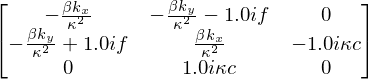

In [29]:
A

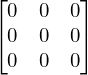

In [8]:
Ah = A.conjugate().transpose()
Ah - A

In [11]:
A.det()

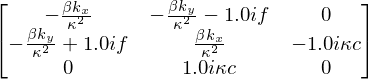

In [30]:
A.conjugate().transpose()

In [31]:
charpoly = A.charpoly(omega)

In [32]:
chareqn = Eq(subsigma(simplify(charpoly.expand())),0)

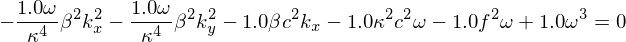

In [33]:
chareqn

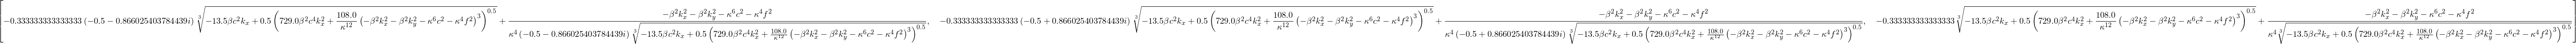

In [34]:
solve(chareqn, omega)

In [ ]:
L = A.eigenvals()
X = A.eigenvects()

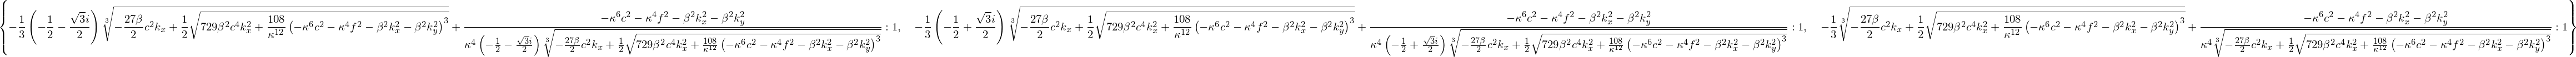

In [4]:
L

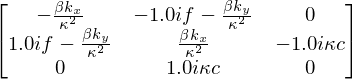

In [ ]:
A

In [ ]:
XX = A.diagonalize()[0]
XX = subsigma(XX)
sig = sqrt(f**2 + ck**2)

NORM = eye(3)
NORM[0,0] = f/sig
NORM[1,1] = ck/(sig*sqrt(2))
NORM[2,2] = ck/(sig*sqrt(2))
XN = subsigma(XX*NORM)

#CONJ = eye(3)
#CONJ[1,1] = -1
#XNCT = (CONJ*XN).transpose()
XNCT = XN.conjugate().transpose()
#XNCT = subsigma(XNCT)
 
#------------Check-----------#
ID = simplifysigma(XN*XNCT)
print 'Identity matrix:'

In [ ]:
ID

In [ ]:
print 'Norm. Eigenvector matrix Xn:'

In [ ]:
XN

In [ ]:
W = Matrix( [psi, -phi, c*eta/kappa] ) * kappa ** 2
U = Matrix( [u,v,eta] )
P = Matrix(( [-1j*ky, 1j*kx, 0],[1j*kx,1j*ky,0],[0,0,kappa] ))

Pinv = simplifykappa(P.inv())
XNCTinv = simplifysigma(XNCT.inv())

Q = Pinv*(XNCTinv)
Q = simplifysigma(Q)
Q = simplifykappa(Q)
Q = subck(Q)

In [ ]:
print 'inversion:'; Pinv

In [ ]:
U,Q,W

In [ ]:
NORM = eye(3)
NORM[2,2] = c
U = NORM*U
#Q = NORM*Q
#W = NORM*W

In [ ]:
U, Q, W

In [ ]:
#RHS BB*
N = XNCT*W
B = expand(subck(N / kappa))
B = simplifysigma(B)

In [ ]:
collect_list = [psi*psi.conjugate(), eta*eta.conjugate(), phi*phi.conjugate(),
                psi*phi.conjugate(), psi*eta.conjugate(),
                phi*psi.conjugate(), phi*eta.conjugate(),
                eta*psi.conjugate(), eta*phi.conjugate()]

In [ ]:
BB2 = subck(simplifykappa(expand(B.conjugate().dot(B))))
collect(BB2,collect_list)

In [ ]:
kappa**2 * psi*psi.conjugate() + kappa**2 * phi*phi.conjugate() + c**2 * eta*eta.conjugate()

In [ ]:
#LHS uu*
U.transpose().conjugate()*U

In [ ]:
simplifykappa(Q.transpose()*Q)

In [ ]:
#U=[Q]W
QW = Q*W

In [ ]:
#collect(subck(simplifykappa(expand(QW.transpose().conjugate()*QW))), collect_list)
QW2 = QW.conjugate().dot(QW)
QW2 = simplifysigma(subck((simplifykappa(expand(QW.conjugate().dot(QW))))))
QW2 = collect(QW2,collect_list)
QW2

In [ ]:
simplifykappa(collect( U.conjugate().dot((P.conjugate().transpose()*P)*U) , 
        [u*u.conjugate(), v*v.conjugate(), eta*eta.conjugate()]))

In [ ]:
subkappa(P.conjugate().transpose()*P)

In [ ]:
P*P.conjugate().transpose()

In [ ]:
P

In [ ]:
XNCT*XN

In [ ]:
simplifysigma(_)

In [ ]:
P

In [ ]:
P*U

In [ ]:
Q

In [ ]:
Q*kappa*abs(sigma)

In [ ]:
XNCT*P/kappa

In [ ]:
subck(XNCT)*W/kappa

In [ ]:
Pinv,XNCTinv

In [ ]:
Q

In [ ]:
W,P,U

In [ ]:
P*U

In [ ]:
Q = kappa*Pinv*(XNCTinv)
Q = simplifysigma(Q)
Q = simplifykappa(Q)
Q = subck(Q)
Q*W

In [ ]:
simplify(Q*B)

In [ ]:
Q